<a href="https://colab.research.google.com/github/pkboom/machine-learning/blob/master/%5Bpractice%5D_Kmeans_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 클러스터링 알고리즘

## [P.1] K-Means 알고리즘

라벨이 없는 데이터셋에 대한 클러스터링 알고리즘들을 구현해볼 것입니다.    
데이터셋은 `make_blobs`를 통해 인위적인 데이터셋을 사용해보겠습니다.    
먼저, [`K-Means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 알고리즘으로 학습하고 평가해봅시다.

In [53]:
from sklearn.datasets import make_blobs

num_classes = 5

X, y = make_blobs(n_samples=1000, centers=num_classes, n_features=2)

print(X.shape, y.shape)

(1000, 2) (1000,)


cls is: 0
cls is: 1
cls is: 2
cls is: 3
cls is: 4


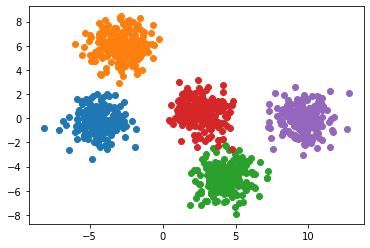

In [54]:
for cls in range(num_classes):
  print("cls is: {}".format(cls))

  plt.scatter(X[:, 0][y == cls], X[:, 1][y == cls])

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_classes, random_state=1)

kmeans.fit(X) # train

KMeans(n_clusters=5, random_state=1)

In [56]:
print('Centroid points: {}'.format(kmeans.cluster_centers_))

Centroid points: [[-2.83595654  5.96996243]
 [ 9.63381339 -0.12825839]
 [ 4.37512376 -4.87535128]
 [-4.40075744 -0.24797267]
 [ 2.70700119  0.46773262]]


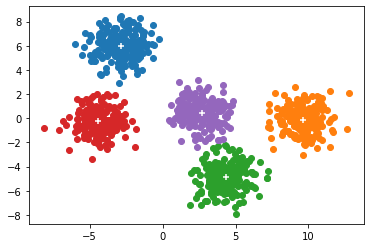

In [57]:
# 예측 결과 시각화
for cls in range(num_classes):
  plt.scatter(X[:, 0][kmeans.labels_ == cls], X[:, 1][kmeans.labels_ == cls])

# Centroid 시각화
for cent in kmeans.cluster_centers_:
  plt.scatter(cent[0], cent[1], marker='+', color='w')

#### 새로운 데이터셋 포인트가 들어오면, `predict` 메써드를 통해 클러스터를 배정해줄 수 있습니다.

In [58]:
X_sample = np.array([[3, 0]])
y_pred = kmeans.predict(X_sample)

print(y_pred)

[4]


In [59]:
# method 1
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(X_sample, kmeans.cluster_centers_))

# method 2
print(kmeans.transform(X_sample))

[[8.34858312 6.63505315 5.06557158 7.40491061 0.55192581]]
[[8.34858312 6.63505315 5.06557158 7.40491061 0.55192581]]


#### `init` argument 값을 변경하면, K-Means++의 최신 알고리즘을 사용할 수 있습니다.

In [60]:
kmeans_plus2 = KMeans(n_clusters=num_classes, 
                      n_init=num_classes, 
                      init='k-means++')
kmeans_plus2.fit(X)

KMeans(n_clusters=5, n_init=5)

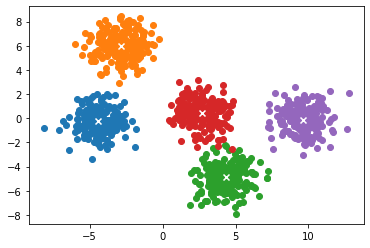

In [61]:
# 시각화
for cls in range(num_classes):
  plt.scatter(X[:, 0][y == cls], X[:, 1][y == cls])

for cent in kmeans_plus2.cluster_centers_:
  plt.scatter(cent[0], cent[1], marker='x', color='w')

#### 실루엣 분석은 다음과 같이 진행하면 됩니다. 실루엣 점수를 통해 가장 적절한 클러스터 개수를 찾아보세요.

In [74]:
from sklearn.metrics import silhouette_score

num_cluster = [2, 3, 4, 5]

for nc in num_cluster:
    kmeans = KMeans(n_clusters=nc, n_init=nc, init='random')
    y_pred = kmeans.fit_predict(X)
    
    score = silhouette_score(X, y_pred)
    
    print('With %s cluster number, K-means score : %.4f' % (nc, score))

With 2 cluster number, K-means score : 0.5460
With 3 cluster number, K-means score : 0.5478
With 4 cluster number, K-means score : 0.6062
With 5 cluster number, K-means score : 0.6944


## [P.2] DBSCAN 알고리즘

### Q.1 K-Means 알고리즘의 문제점은 무엇이었나요?

위의 문제점을 해결할 수 있는 [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)을 구현해보고, 실제로 잘 동작하는지 살펴봅시다.

In [96]:
# make moons 데이터셋 불러오기
from sklearn.datasets import make_moons # moons dataset

X, y = make_moons(n_samples=1000, noise=0.1) # add noise

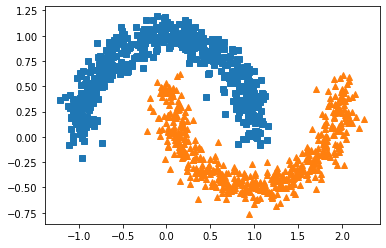

In [97]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
plot_dataset(X, y)

With 2 cluster number, K-means score : 0.4896


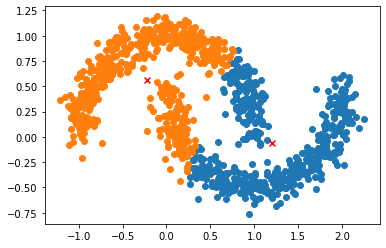

In [98]:
# K-Means 학습 후 시각화
num_classes = 2
kmeans = KMeans(n_clusters=num_classes, n_init=num_classes, init='random')
y_pred = kmeans.fit_predict(X)

for cls in range(num_classes):
  plt.scatter(X[:, 0][kmeans.labels_ == cls], X[:, 1][kmeans.labels_ == cls])

for cent in kmeans.cluster_centers_:
  plt.scatter(cent[0], cent[1], marker='x', color='red')

score = silhouette_score(X, y_pred)

print('With %s cluster number, K-means score : %.4f' % (2, score))

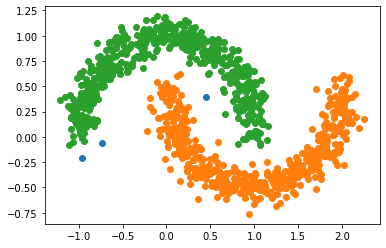

In [108]:
# DBSCAN 학습 후 시각화
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=30)
y_pred = dbscan.fit_predict(X)
for cls in np.unique(y_pred):
  plt.scatter(X[:, 0][y_pred == cls], X[: ,1][y_pred == cls])